In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## data loading

# dataframe without labels
train_data = pd.read_csv('training_set_features.csv')
# labels
labels_data = pd.read_csv('training_set_labels.csv')

df = train_data.merge(labels_data, on = 'respondent_id')

# Exploratory analysis

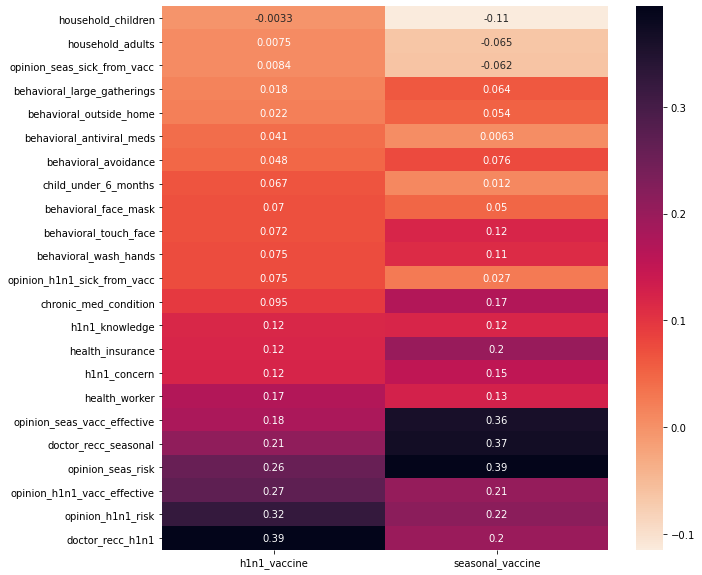

In [3]:
## Correlations between vaccination and numerical features in the dataset

for_vis = df.drop(['respondent_id'], axis=1).corr()[['h1n1_vaccine', 'seasonal_vaccine']]

for_vis = for_vis.drop('h1n1_vaccine', axis = 0)
for_vis = for_vis.drop('seasonal_vaccine', axis = 0)
for_vis = for_vis.sort_values(['h1n1_vaccine', 'seasonal_vaccine'])

cmap = sns.cm.rocket_r
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(for_vis, cmap = cmap, annot=True);

C:\Users\a120\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:162: RuntimeWarning: invalid value encountered in greater
  notreject = pvals > alphacSidak_all
C:\Users\a120\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


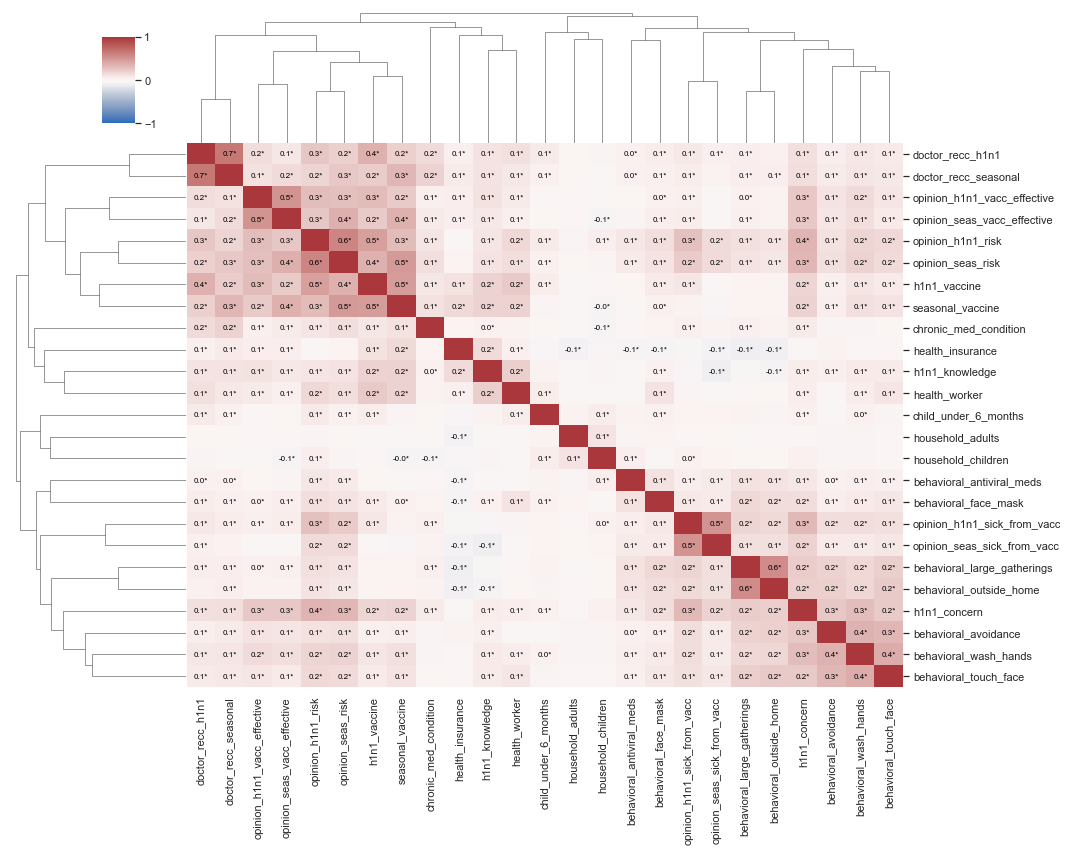

In [4]:
## Correlations between all numerical features in the dataset

from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.multitest import multipletests

sns.set(font_scale=1)

def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = pearsonr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(df.drop(['respondent_id'], axis=1))

# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting
g = sns.clustermap(correlations, cmap="vlag", vmin=-1, vmax=1, figsize=(15, 12))

# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if (i != j):# & (i > j):
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.5,
                str(round(correlations.iloc[ix, jx], 1))+ "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(8)

#g.fig.subplots_adjust(right=0.)
g.ax_cbar.set_position((0.1, .85, .03, .1))

# Save a high-res copy of the image to disk
# plt.tight_layout()
#plt.savefig("clustermap.png", dpi=200)

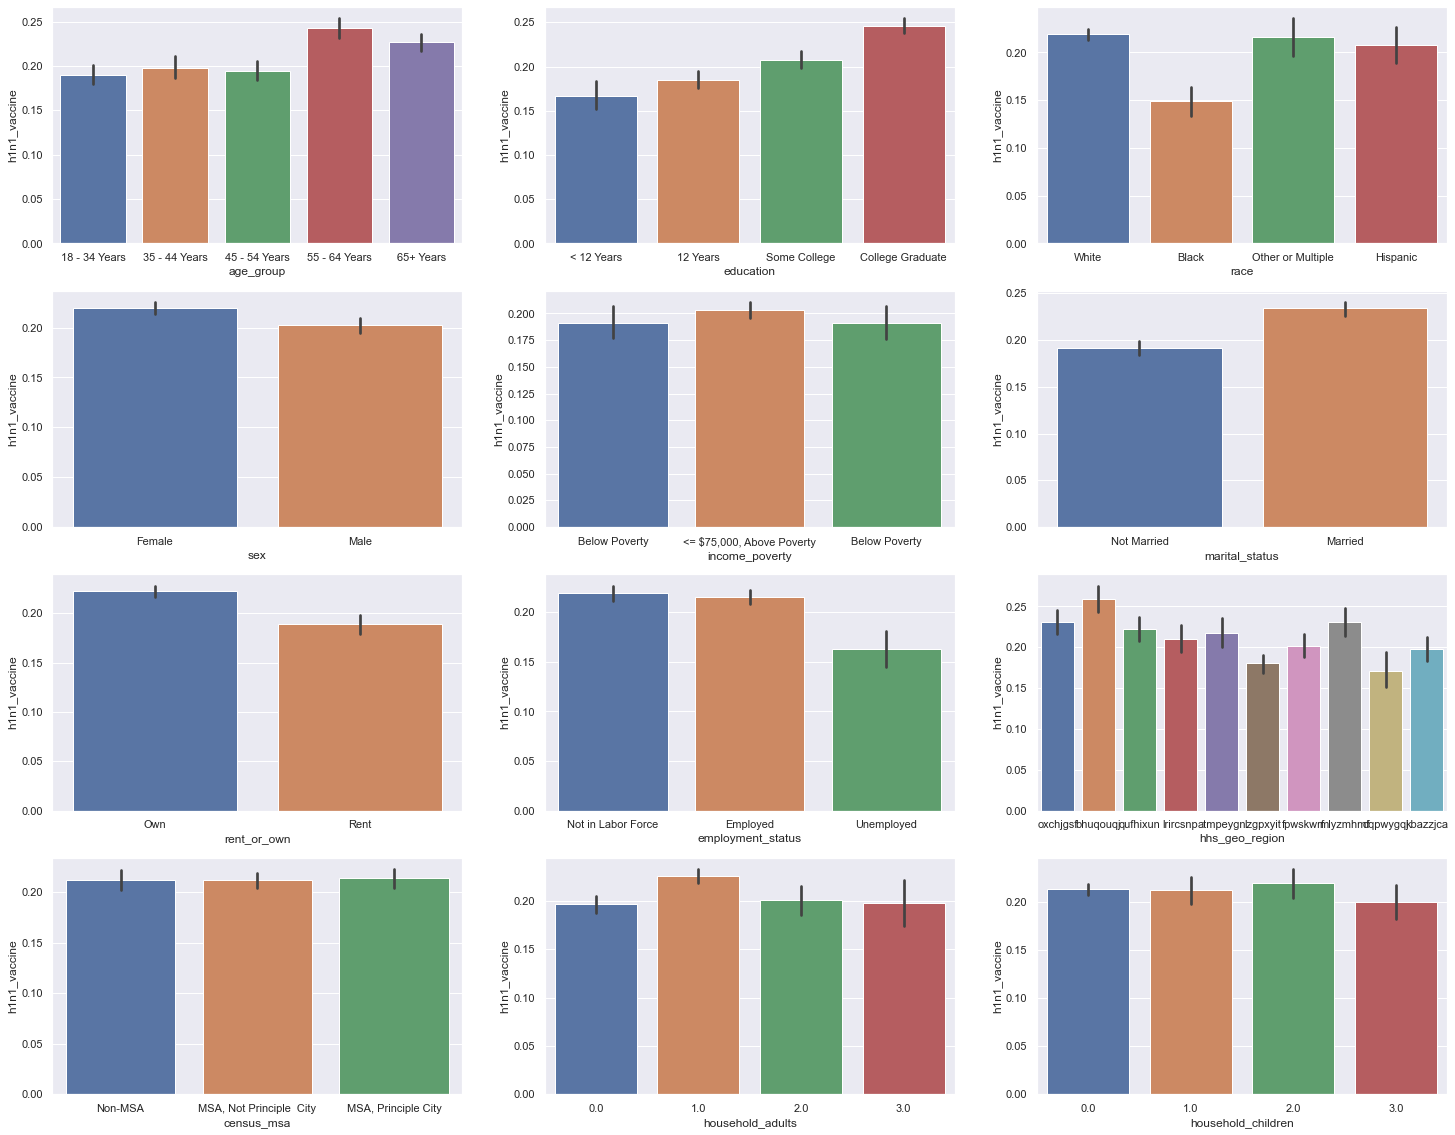

In [5]:
## Categorical features -- H1N1 vaccine

fig, axes = plt.subplots(4, 3, figsize=(25, 20))
order_a = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
order_e = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
order_p = ['Below Poverty', '<= $75,000, Above Poverty', 'Below Poverty']

sns.barplot(ax=axes[0, 0], data=df, y='h1n1_vaccine', x='age_group', order = order_a)
sns.barplot(ax=axes[0, 1], data=df, y='h1n1_vaccine', x='education', order = order_e)
sns.barplot(ax=axes[0, 2], data=df, y='h1n1_vaccine', x='race')
sns.barplot(ax=axes[1, 0], data=df, y='h1n1_vaccine', x='sex')
sns.barplot(ax=axes[1, 1], data=df, y='h1n1_vaccine', x='income_poverty', order = order_p)
sns.barplot(ax=axes[1, 2], data=df, y='h1n1_vaccine', x='marital_status')
sns.barplot(ax=axes[2, 0], data=df, y='h1n1_vaccine', x='rent_or_own')
sns.barplot(ax=axes[2, 1], data=df, y='h1n1_vaccine', x='employment_status')
sns.barplot(ax=axes[2, 2], data=df, y='h1n1_vaccine', x='hhs_geo_region')
sns.barplot(ax=axes[3, 0], data=df, y='h1n1_vaccine', x='census_msa')
sns.barplot(ax=axes[3, 1], data=df, y='h1n1_vaccine', x='household_adults')
sns.barplot(ax=axes[3, 2], data=df, y='h1n1_vaccine', x='household_children');

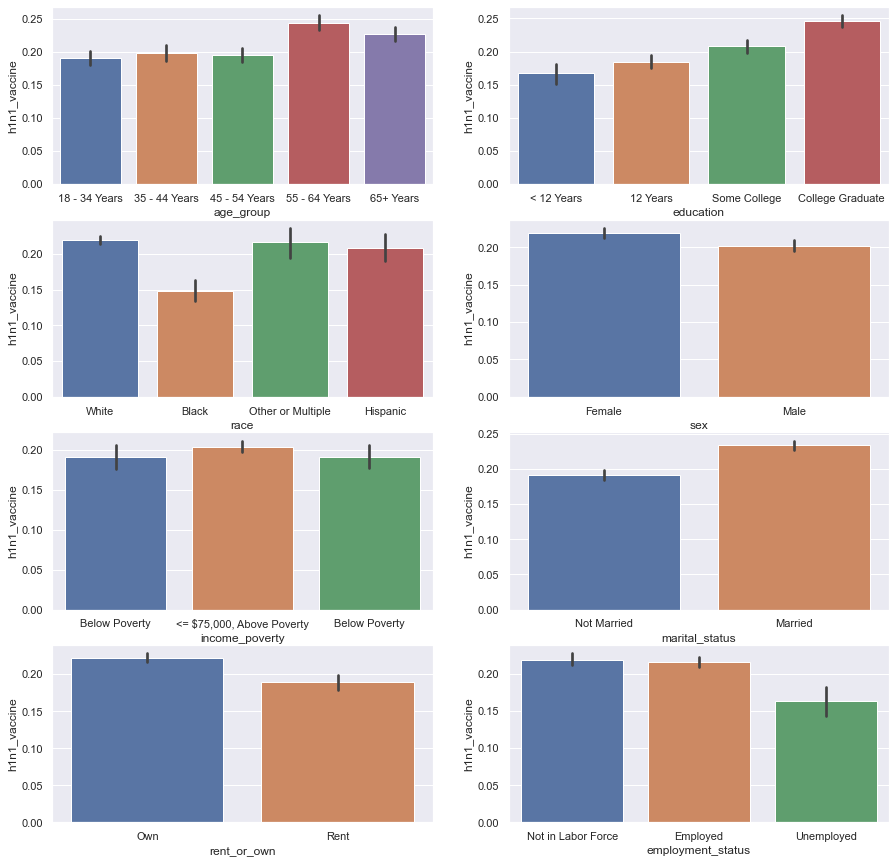

In [6]:
## The same plot without unimportant features -- H1N1 vaccine

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
order_a = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
order_e = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
order_p = ['Below Poverty', '<= $75,000, Above Poverty', 'Below Poverty']

sns.barplot(ax=axes[0, 0], data=df, y='h1n1_vaccine', x='age_group', order = order_a)
sns.barplot(ax=axes[0, 1], data=df, y='h1n1_vaccine', x='education', order = order_e)
sns.barplot(ax=axes[1, 0], data=df, y='h1n1_vaccine', x='race')
sns.barplot(ax=axes[1, 1], data=df, y='h1n1_vaccine', x='sex')
sns.barplot(ax=axes[2, 0], data=df, y='h1n1_vaccine', x='income_poverty', order = order_p)
sns.barplot(ax=axes[2, 1], data=df, y='h1n1_vaccine', x='marital_status')
sns.barplot(ax=axes[3, 0], data=df, y='h1n1_vaccine', x='rent_or_own')
sns.barplot(ax=axes[3, 1], data=df, y='h1n1_vaccine', x='employment_status');

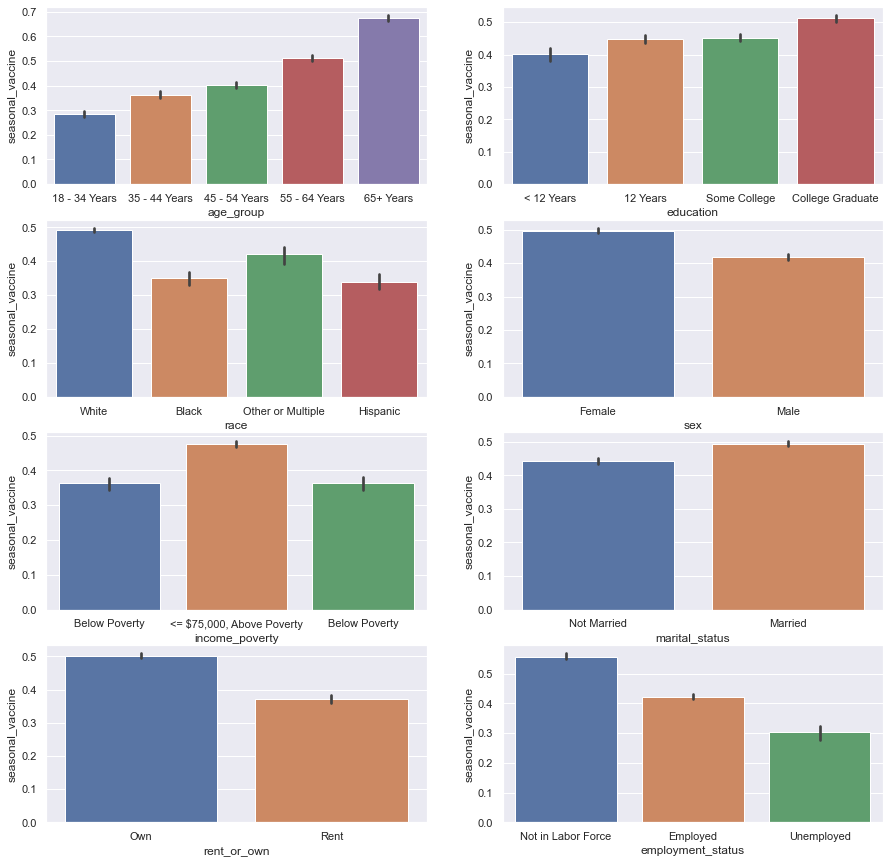

In [7]:
## The same plot without unimportant features -- seasonal vaccine

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
order_a = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
order_e = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
order_p = ['Below Poverty', '<= $75,000, Above Poverty', 'Below Poverty']

sns.barplot(ax=axes[0, 0], data=df, y='seasonal_vaccine', x='age_group', order = order_a)
sns.barplot(ax=axes[0, 1], data=df, y='seasonal_vaccine', x='education', order = order_e)
sns.barplot(ax=axes[1, 0], data=df, y='seasonal_vaccine', x='race')
sns.barplot(ax=axes[1, 1], data=df, y='seasonal_vaccine', x='sex')
sns.barplot(ax=axes[2, 0], data=df, y='seasonal_vaccine', x='income_poverty', order = order_p)
sns.barplot(ax=axes[2, 1], data=df, y='seasonal_vaccine', x='marital_status')
sns.barplot(ax=axes[3, 0], data=df, y='seasonal_vaccine', x='rent_or_own')
sns.barplot(ax=axes[3, 1], data=df, y='seasonal_vaccine', x='employment_status');

# Data preprocessing

## Rank variables

Among categorical variables there are three ordered variables: age group, education, income. We will replace them with ranks.

- 18 - 34 Years -- 1
- 35 - 44 Years -- 2
- 45 - 54 Years -- 3
- 55 - 64 Years -- 4
- 65+ Years -- 5


- < 12 Years -- 1
- 12 Years -- 2
- Some college -- 3
- College Graduate -- 4


- Below Poverty -- 1
- less or equal to 75,000, Above Poverty -- 2
- more than 75,000 -- 3

In [8]:
df.age_group = pd.Categorical(df.age_group, 
                      categories=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'],
                      ordered=True)
df.age_group = df.age_group.cat.codes
df.education = pd.Categorical(df.education, 
                      categories=['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
                      ordered=True)
df.education = df.education.cat.codes
df.income_poverty = pd.Categorical(df.income_poverty, 
                      categories=['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
                      ordered=True)
df.income_poverty = df.income_poverty.cat.codes

## Dealing with Nans

In [9]:
print(df.isnull().sum(axis = 0))

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

Since further we will use get_dummies, we will let Nan be as they are. In this case if the variable value is Nan, in all corresponding columns will be zeros.

## Converting categorical values in dummy columns

In [10]:
cat_columns = ['education', 'race', 'sex', 'marital_status', 'rent_or_own',
               'employment_status', 'hhs_geo_region', 'census_msa',
               'employment_industry', 'employment_occupation']
dums = pd.get_dummies(df[cat_columns])
df = df.drop(cat_columns, axis='columns')
df = pd.concat([df, dums], axis = 1)

# XGBclassifier model

## Seasonal vaccine

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [12]:
parameters = {'n_estimators':np.arange(30, 40), 'max_depth':np.arange(4, 8)}
xgb = XGBClassifier(use_label_encoder=False)
clf = GridSearchCV(xgb, parameters)
clf.fit(df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['seasonal_vaccine'])

[10:46:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:54:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [13]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 30}

In [14]:
parameters = {'importance_type':['weight', 'gain', 'cover'], 'learning_rate':np.arange(0.2, 0.4, 0.01)}
xgb = XGBClassifier(use_label_encoder=False, n_estimators=33, max_depth=6)
clf = GridSearchCV(xgb, parameters)
clf.fit(df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['seasonal_vaccine'])

[10:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:55:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:01:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:02:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=6, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                  

In [15]:
clf.best_params_

{'importance_type': 'weight', 'learning_rate': 0.2}

In [16]:
xgb = XGBClassifier(use_label_encoder=False, n_estimators=33, max_depth=6, importance_type='weight', learning_rate=0.2)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df.seasonal_vaccine, random_state=42)
xgb.fit(X_train, y_train, eval_metric='error')
predicted = xgb.predict_proba(X_test)

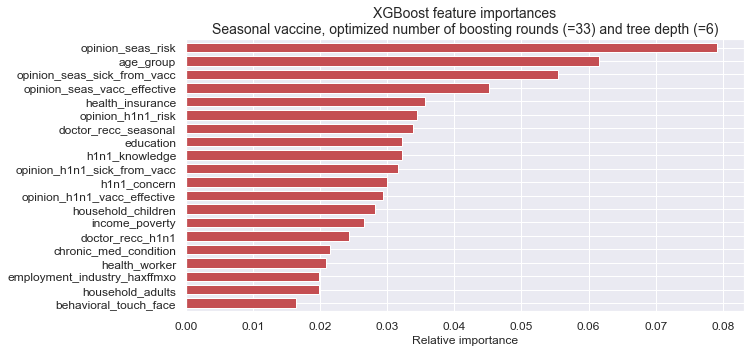

In [17]:
# feature importance
ids = np.argsort(xgb.feature_importances_)
df_feature_imp = pd.DataFrame({"Xgboost": xgb.feature_importances_[ids]}, index=np.array(X_train.columns.values[:])[ids])

df_feature_imp.tail(20).plot.barh(color='r', width=0.7, figsize=(10,5))
plt.title("XGBoost feature importances\nSeasonal vaccine, optimized number of boosting rounds (=33) and tree depth (=6)", fontsize=14)
plt.xlabel("Relative importance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().get_legend().remove()
# plt.savefig("feature_importances.png")

In [18]:
## Cross-validation score
fpr_seas_optim, tpr_seas_optim, thresholds_seas_optim = roc_curve(y_test, predicted[:, 1])
xgb = XGBClassifier(use_label_encoder=False, n_estimators=33, max_depth=6, importance_type='weight', learning_rate=0.2)
res_seasonal_optim = cross_val_score(xgb, df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['seasonal_vaccine'], scoring='roc_auc')
round(np.mean(res_seasonal_optim), 2),  round(np.std(res_seasonal_optim), 2)

[11:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.86, 0.0)

## H1N1 vaccine

In [19]:
xgb = XGBClassifier(use_label_encoder=False, n_estimators=33, max_depth=6, importance_type='weight', learning_rate=0.2)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df.h1n1_vaccine, random_state=42)
xgb.fit(X_train, y_train, eval_metric='error')
predicted = xgb.predict_proba(X_test)

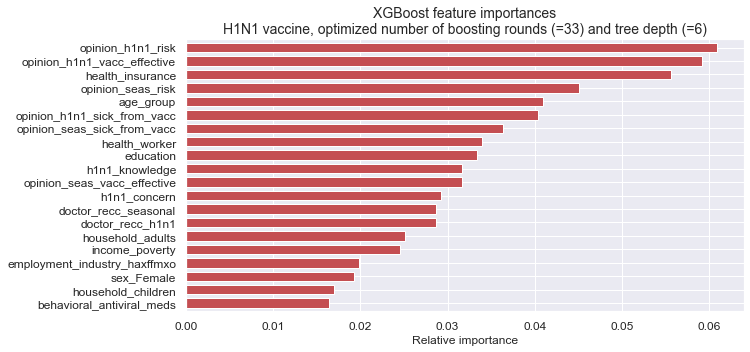

In [20]:
# feature importance
ids = np.argsort(xgb.feature_importances_)
df_feature_imp = pd.DataFrame({"Xgboost": xgb.feature_importances_[ids]}, index=np.array(X_train.columns.values[:])[ids])

df_feature_imp.tail(20).plot.barh(color='r', width=0.7, figsize=(10,5))
plt.title("XGBoost feature importances\nH1N1 vaccine, optimized number of boosting rounds (=33) and tree depth (=6)", fontsize=14)
plt.xlabel("Relative importance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().get_legend().remove()
# plt.savefig("feature_importances.png")

In [21]:
## cross-validation score

fpr_h1n1_optim, tpr_h1n1_optim, thresholds_h1n1_optim = roc_curve(y_test, predicted[:, 1])
xgb = XGBClassifier(use_label_encoder=False, n_estimators=33, max_depth=6, importance_type='weight', learning_rate=0.2)
res_h1n1_optim = cross_val_score(xgb, df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['h1n1_vaccine'], scoring='roc_auc')
round(np.mean(res_h1n1_optim), 2),  round(np.std(res_h1n1_optim), 2)

[11:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.87, 0.01)

## Model with restricted parameters -- seasonal vaccine

In [22]:
xgb = XGBClassifier(use_label_encoder=False, n_estimators=3, max_depth=3, importance_type='weight', learning_rate=0.2)
res_h1n1 = cross_val_score(xgb, df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['h1n1_vaccine'], scoring='roc_auc')
np.mean(res_h1n1), np.std(res_h1n1)

[11:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.8295048092135018, 0.007151259605715882)

In [23]:
xgb = XGBClassifier(use_label_encoder=False, n_estimators=3, max_depth=3, importance_type='weight', learning_rate=0.2)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df.seasonal_vaccine, random_state=42)
xgb.fit(X_train, y_train)
predicted = xgb.predict_proba(X_test)
fpr_seas, tpr_seas, thresholds_seas = roc_curve(y_test, predicted[:, 1])
xgb = XGBClassifier(use_label_encoder=False, n_estimators=3, max_depth=3, importance_type='weight', learning_rate=0.2)
res_seasonal = cross_val_score(xgb, df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['seasonal_vaccine'], scoring='roc_auc')
round(np.mean(res_seasonal), 2),  round(np.std(res_seasonal), 2)

[11:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.82, 0.01)

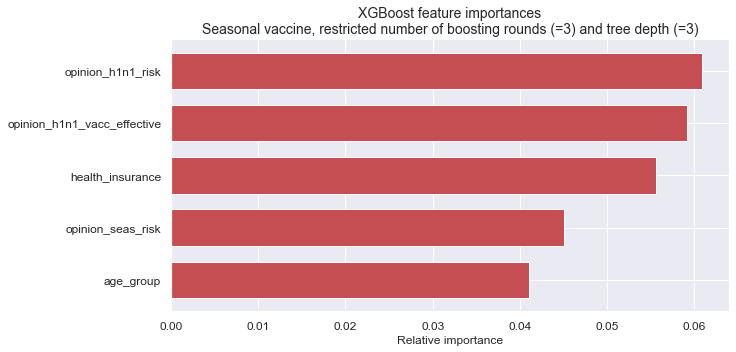

In [24]:
# feature importance

xgb = XGBClassifier(use_label_encoder=False, n_estimators=33, max_depth=6, importance_type='weight', learning_rate=0.2)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df.h1n1_vaccine, random_state=42)
xgb.fit(X_train, y_train, eval_metric='error')
predicted = xgb.predict_proba(X_test)

ids = np.argsort(xgb.feature_importances_)
df_feature_imp = pd.DataFrame({"Xgboost": xgb.feature_importances_[ids]}, index=np.array(X_train.columns.values[:])[ids])

df_feature_imp.tail(5).plot.barh(color='r', width=0.7, figsize=(10,5))
plt.title("XGBoost feature importances\nSeasonal vaccine, restricted number of boosting rounds (=3) and tree depth (=3)", fontsize=14)
plt.xlabel("Relative importance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().get_legend().remove()
# plt.savefig("feature_importances.png")

## Model with restricted parameters -- H1N1 vaccine

In [25]:
xgb = XGBClassifier(use_label_encoder=False, n_estimators=3, max_depth=3, importance_type='weight', learning_rate=0.2)
res_h1n1 = cross_val_score(xgb, df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis=1), df['h1n1_vaccine'], scoring='roc_auc')
round(np.mean(res_h1n1), 2),  round(np.std(res_h1n1), 2)

[11:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

(0.83, 0.01)

In [26]:
xgb = XGBClassifier(use_label_encoder=False, n_estimators=3, max_depth=3, importance_type='weight', learning_rate=0.2)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['respondent_id', 'seasonal_vaccine', 'h1n1_vaccine'], axis=1), df.h1n1_vaccine, random_state=42)
xgb.fit(X_train, y_train)
predicted = xgb.predict_proba(X_test)
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test, predicted[:, 1])

[11:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


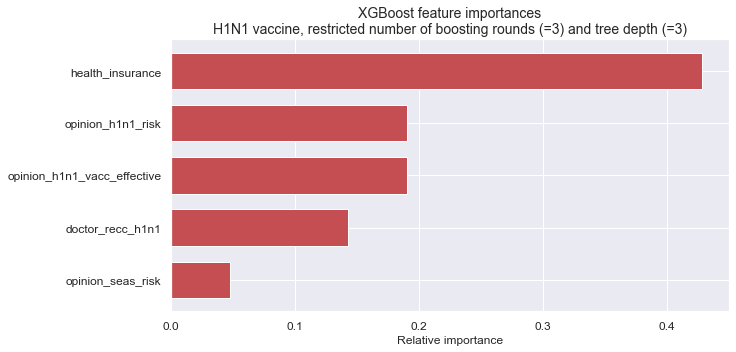

In [27]:
# feature importance
ids = np.argsort(xgb.feature_importances_)
df_feature_imp = pd.DataFrame({"Xgboost": xgb.feature_importances_[ids]}, index=np.array(X_train.columns.values[:])[ids])

df_feature_imp.tail(5).plot.barh(color='r', width=0.7, figsize=(10,5))
plt.title("XGBoost feature importances\nH1N1 vaccine, restricted number of boosting rounds (=3) and tree depth (=3)", fontsize=14)
plt.xlabel("Relative importance", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().get_legend().remove()
# plt.savefig("feature_importances.png")

## Models comparison

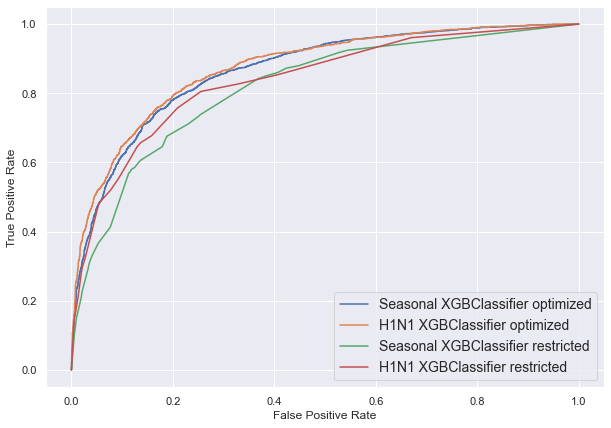

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(fpr_seas_optim, tpr_seas_optim, label="Seasonal XGBClassifier optimized")
plt.plot(fpr_h1n1_optim, tpr_h1n1_optim, label="H1N1 XGBClassifier optimized")
plt.plot(fpr_seas, tpr_seas, label="Seasonal XGBClassifier restricted")
plt.plot(fpr_h1n1, tpr_h1n1, label="H1N1 XGBClassifier restricted")
plt.legend(fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()